In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-09-27 08:48:51--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.08s   

2025-09-27 08:48:52 (10.1 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv("car_fuel_efficiency.csv")
data.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [19]:
columns_to_train = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

In [20]:
[c for c in data.columns if c not in columns_to_train]

['num_cylinders',
 'acceleration',
 'origin',
 'fuel_type',
 'drivetrain',
 'num_doors']

In [21]:
data.drop(columns=[c for c in data.columns if c not in columns_to_train], inplace=True)
data

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

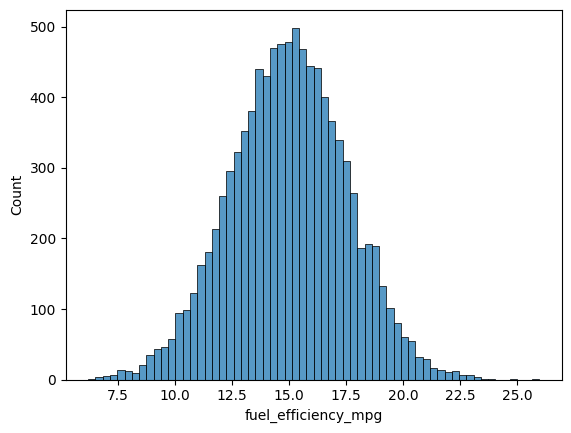

In [22]:
sns.histplot(data.fuel_efficiency_mpg)

In [23]:
data.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [24]:
data.horsepower.median()

np.float64(149.0)

In [ ]:
n = len(data)  # Use the number of rows in the DataFrame
n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val

idx = np.arange(n)

np.random.seed(9)
np.random.shuffle(idx)

df_train = data.iloc[idx[:n_train]]
df_test = data.iloc[idx[n_train:n_train+n_test]]
df_val = data.iloc[idx[n_train+n_test:]]

df_train.size, df_test.size, df_val.size

(29120, 9700, 9700)

In [ ]:
n = len(data)
n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val

idx = np.arange(n)

def train_lr(X, y, r):
    return np.dot(np.linalg.inv(X.T.dot(X) + (r * np.eye(X.shape[1]))), np.dot(X.T, y))

def lin_reg(X, W):
    return X.dot(W)

def rmse_me(y, y_pred):
    return np.round(np.sqrt(((y - y_pred)**2).mean()), 3)

rmse_list = []
for seed in range(10):
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = data.iloc[idx[:n_train]]
    df_test = data.iloc[idx[n_train:n_train+n_test]]
    df_val = data.iloc[idx[n_train+n_test:]]

    df_train_0 = df_train.copy()
    df_train_0.horsepower = df_train_0.horsepower.fillna(0)

    X_0 = df_train_0.iloc[:, :-1].values
    ones = np.ones(X_0.shape[0])
    X_0 = np.column_stack([ones, X_0])
    y_0 = df_train_0.iloc[:, -1:].values

    df_val_0 = df_val.copy()
    df_val_0.horsepower = df_val_0.horsepower.fillna(0)

    X_val = df_val_0.iloc[:, :-1].values
    ones = np.ones(X_val.shape[0])
    X_val = np.column_stack([ones, X_val])
    y_val = df_val_0.iloc[:, -1:].values

    W_0 = train_lr(X_0, y_0, 0)

    rmse_list.append(rmse_me(lin_reg(X_val, train_lr(X_0, y_0, 0)), y_val))

np,round(np.std(rmse_list), 3)

(<module 'numpy' from '/Users/purujitb/workspace/ml-zoomcamp-hw/.venv/lib/python3.13/site-packages/numpy/__init__.py'>,
 np.float64(0.007))

In [185]:
n = len(data)
n_test = int(n * 0.2)
n_train = n - n_test

idx = np.arange(n)

def train_lr(X, y, r):
    return np.dot(np.linalg.inv(X.T.dot(X) + (r * np.eye(X.shape[1]))), np.dot(X.T, y))

def lin_reg(X, W):
    return X.dot(W)

def rmse_me(y, y_pred):
    return np.round(np.sqrt(((y - y_pred)**2).mean()), 3)

for seed in [9]:
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = data.iloc[idx[:n_train]]
    df_test = data.iloc[idx[n_train:]]

    df_train_0 = df_train.copy()
    df_train_0.horsepower = df_train_0.horsepower.fillna(0)

    X_0 = df_train_0.iloc[:, :-1].values
    ones = np.ones(X_0.shape[0])
    X_0 = np.column_stack([ones, X_0])
    y_0 = df_train_0.iloc[:, -1:].values

    df_test_0 = df_test.copy()
    df_test_0.horsepower = df_test_0.horsepower.fillna(0)

    X_test = df_test_0.iloc[:, :-1].values
    ones = np.ones(X_test.shape[0])
    X_test = np.column_stack([ones, X_test])
    y_test = df_test_0.iloc[:, -1:].values

    W_0 = train_lr(X_0, y_0, 0)

    print(rmse_me(lin_reg(X_test, train_lr(X_0, y_0, 0.001)), y_test))

0.516


In [150]:
df_train_0 = df_train.copy()
df_train_0.horsepower = df_train_0.horsepower.fillna(0)

orig_mean = df_train['horsepower'].mean()
df_train_mean = df_train.copy()
df_train_mean.horsepower = df_train_mean.horsepower.fillna(df_train.horsepower.mean())

In [151]:
df_train.horsepower.mean(), df_train_0.horsepower.mean(), df_train_mean.horsepower.mean()

(np.float64(149.696587537092),
 np.float64(138.59271978021977),
 np.float64(149.69658753709197))

In [153]:
def rmse_me(y, y_pred):
    return np.round(np.sqrt(((y - y_pred)**2).mean()), 3)

In [154]:
X_0 = df_train_0.iloc[:, :-1].values
ones = np.ones(X_0.shape[0])
X_0 = np.column_stack([ones, X_0])
y_0 = df_train_0.iloc[:, -1:].values
X_mean = df_train_mean.iloc[:, :-1].values
X_mean = np.column_stack([ones, X_mean])
y_mean = df_train_mean.iloc[:, -1:].values
X_0, y_0

(array([[1.00000000e+00, 2.40000000e+02, 1.36000000e+02, 4.05051229e+03,
         2.00600000e+03],
        [1.00000000e+00, 1.90000000e+02, 1.41000000e+02, 3.19586694e+03,
         2.01700000e+03],
        [1.00000000e+00, 2.00000000e+02, 1.84000000e+02, 3.00616437e+03,
         2.01700000e+03],
        ...,
        [1.00000000e+00, 2.10000000e+02, 1.58000000e+02, 3.76675310e+03,
         2.01500000e+03],
        [1.00000000e+00, 1.40000000e+02, 1.66000000e+02, 2.68314783e+03,
         2.00800000e+03],
        [1.00000000e+00, 2.00000000e+02, 1.64000000e+02, 2.37993849e+03,
         2.00400000e+03]], shape=(5824, 5)),
 array([[10.30469994],
        [13.47943378],
        [16.19065297],
        ...,
        [10.59243514],
        [17.11926051],
        [18.11450381]], shape=(5824, 1)))

In [155]:
def train_lr(X, y, r):
    return np.dot(np.linalg.inv(X.T.dot(X) + (r * np.eye(X.shape[1]))), np.dot(X.T, y))

W_0 = train_lr(X_0, y_0, 0)
W_mean = train_lr(X_mean, y_mean, 0)
W_0, W_mean

(array([[ 2.75138526e+01],
        [-7.49245681e-05],
        [ 3.51310422e-03],
        [-5.02056083e-03],
        [ 1.02939922e-03]]),
 array([[ 2.76725755e+01],
        [ 7.55264124e-05],
        [ 1.00350250e-02],
        [-5.02056898e-03],
        [ 4.30803050e-04]]))

In [ ]:
def lin_reg(X, W):
    return X.dot(W)


# for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
#     print(rmse_me(lin_reg(X_0, train_lr(X_0, y_0, r)), y_0))
print(rmse_me(lin_reg(X_0, train_lr(X_0, y_0, 0)), y_0))
# rmse_me(lin_reg(X_0, train_lr(X_0, y_0, 0)), y_0), rmse_me(lin_reg(X_0, train_lr(X_0, y_0, 0.01)), y_0), rmse_me(lin_reg(X_0, train_lr(X_0, y_0, 1)), y_0), rmse_me(lin_reg(X_0, train_lr(X_0, y_0, 10)), y_0), rmse_me(lin_reg(X_0, train_lr(X_0, y_0, 100)), y_0)

0.522


In [158]:
round(np.array([0.517, 0.515, 0.521, 0.52, 0.517, 0.517, 0.52, 0.512, 0.525, 0.524, 0.522]).std(), 3)

np.float64(0.004)